My take on the final programming exercise in [Google's Data Prep course](https://developers.google.com/machine-learning/data-prep/programming-exercise). I've borrowed the code basics from them but decided to go for scikit-learn's models instead of TensorFlow.

The dataset used is the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile) from the UCI Machine Learning Repository.

The dataset is described as follows:

*This data set consists of three types of entities:*
* *(a) the specification of an auto in terms of various characteristics,* 
* *(b) its assigned insurance risk rating, *
* *(c) its normalized losses in use as compared to other cars.* 

*The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.*

*The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.*

*Note: Several of the attributes in the database could be used as a "class" attribute.*

My task here is to build a model that would be able to predict car price based on the attributes provided in the dataset.

As a data science and ML newbie, I am going to try out my current skills and see how skillful of a prediction model I can create. This is what I am intending to do:

* Explore the data, determine what kind of feature engineering I will need to go, e.g. filling missing values, converting features to numeric, normalization, etc.
* Select a few regression models and get a baseline performance score without any feature transformation, except for obviously making sure that there are no missings values and the features are numeric.
* Explore the data and see what I can do in order to optimize the models. I will mainly use normalization since that's a technique I am more or less familiar with. I won't be doing feature crosses since I am still researching this method.
* Train the models with the normalized data.
* Evaluate the models' performance using k-fold cross validation.
* Change a few model parameters to see if anything can be improved further.
* Assess the results and hopefully choose a model from the ones trained.

Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Time to import the dataset. We need to manually input the feature names since they aren't included in the csv file by default.

In [2]:
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']


car_data = pd.read_csv('https://storage.googleapis.com/mledu-datasets/cars_data.csv',
                        sep=',', names=feature_names, header=None, encoding='latin-1')

Now comes data examination. I'll have a look at the head & tail of the dataset, its stats, size, and check on missing values & present data types.

In [3]:
car_data.shape

(205, 26)

In [4]:
car_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
car_data.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
car_data.describe()

,symboling,wheel-base,length,width,height,weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


You can immediately notice one problem with this dataset - it has missing values that are marked with '?' This will need to be dealt with.

In [7]:
car_data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-doors            0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
weight               0
engine-type          0
num-cylinders        0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

A NaN check tells us that there are no missing values in the dataset, which isn't actually true since we have to deal with '?' inserted in the place of missing values. While there technically are no missing values in the dataset, ML models will be unable to learn on the data since they can't do math operations on strings, which '?' seems to be.

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-doors            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
weight               205 non-null int64
engine-type          205 non-null object
num-cylinders        205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

We also notice that some features that are expected to be numeric ('price', 'peak-rpm', 'horsepower', etc.) are actually not numeric, so they will need conversion.

As suggested by the Google Data Prep course , I divide the features into numeric and categorical.

In [9]:
label = 'price'
numeric_features= ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
                  'weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                  'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

categorical_features = list(set(car_data.columns.values) - set(numeric_features) - set([label]))

Let's now deal with the wrong data types of numeric features. If you remember, we have the problem of '?', but the *to_numeric* method of Pandas allows an easy workaround for it.
The *to_numeric* method will convert the data type of the features to either float64 or int64. The argument *coerce* allows the method to catch exceptions and set values that cannot be converted to numeric to NaN. This should solve the problem with '?'.

In [10]:
for feature in numeric_features + [label]:
    car_data[feature] = pd.to_numeric(car_data[feature], errors='coerce')    

Let's again check for NaNs to see how the *to_numeric* method did its job.

In [11]:
car_data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-doors             0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
weight                0
engine-type           0
num-cylinders         0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We notice that there is a large number of values missing from the "normalized-losses column" - 41 values is nearly 25% of the 205 examples! Filling these features may be detrimental for model performance, but we'll see.

In [12]:
car_data.fillna(car_data.mean(), inplace=True)

In [13]:
car_data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-doors            0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
weight               0
engine-type          0
num-cylinders        0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that we have filled the missing values with the means from the respective column, ML models should have no problems with their computation. Note that I am aware that filling in the mean values isn't always the best option of dealing with missing values, but I'm using it for simplicity.

From now on, the code is written by me. Most of the above was borrowed from the final programming exercise of Google's Data Prep course.

We are now going to encode the categorical features via scikit-learn's LabelEncoder.

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_features:
    car_data[feature] = le.fit_transform(car_data[feature])

In [15]:
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


I am aware that the *le* object will save the parameters of the last column it learned on. That is, after the loop ends, the label encoder object will only be able inverse transform the encodings of the last column it has seen. To avoid this issue, several label encoders are required, but I am skipping this step since I don't need it.

We have dealt with issues spotted so far, so let's now have a good look at the dataset's stats to see what we need to do with it.

In [16]:
car_data.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,12.195122,0.902439,0.180488,1.424390,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.274831,0.297446,0.385535,0.514867,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,8.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,12.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,19.000000,1.000000,0.000000,2.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Notice how the values of the label "price" are on a much higher scale than the features in this model. This applies to less extent to other columns as well. We thus need to scale down some of the features' values.

Whether or not other normalization methods will be required will be showed by a histogram. At the moment, I am not going to do any normalization - I want to get a baseline score with the selected models, upon which I then will seek to improve.

Let's split the data into train and test sets and feed it to a couple of models - linear regression, SGD linear regression, support vector regression, decision tree regression, and random forest regression. For now, I will use default model parameters.

In [17]:
from sklearn.model_selection import train_test_split

X = car_data.drop('price', axis=1)
y = car_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_regressor = LinearRegression()
sgd_regressor = SGDRegressor()
svr = SVR(gamma='auto')
tree_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()

lin_regressor.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
svr.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

print('Linear regressor train score: ', lin_regressor.score(X_train, y_train))
print('Linear regressor test score: ', lin_regressor.score(X_test, y_test))

print('SGD linear regressor train score: ', sgd_regressor.score(X_train, y_train))
print('SGD linear regressor test score: ', sgd_regressor.score(X_test, y_test))

print('SVR train score: ', svr.score(X_train, y_train))
print('SVR test score: ', svr.score(X_test, y_test))

print('Decision tree regressor train score: ', tree_regressor.score(X_train, y_train))
print('Decision tree regressor test score: ', tree_regressor.score(X_test, y_test))

print('Random forest regressor train score: ', rf_regressor.score(X_train, y_train))
print('Random forest regressor test score: ', rf_regressor.score(X_test, y_test))

Linear regressor train score:  0.8643142597087968
Linear regressor test score:  0.8838190931881558
SGD linear regressor train score:  -9.35663858121074e+24
SGD linear regressor test score:  -8.276417589330869e+24
SVR train score:  -0.09177563421794122
SVR test score:  -0.17294543703090093
Decision tree regressor train score:  0.9993291774670671
Decision tree regressor test score:  0.8862165939275279
Random forest regressor train score:  0.9603248900271449
Random forest regressor test score:  0.883119498476991


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SGD Regressor and SVR have poor performance, while Linear Regression, Decision Tree Regressor, and Random Forest Regressor show good training scores but demonstrate poor generalization, as evidenced by the low test scores.

Now that we have a baseline, let's have a look at the visualization of our numeric features and try to preprocess them to improve the results.

Let's have a look at the vale distribution of our numeric features.

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


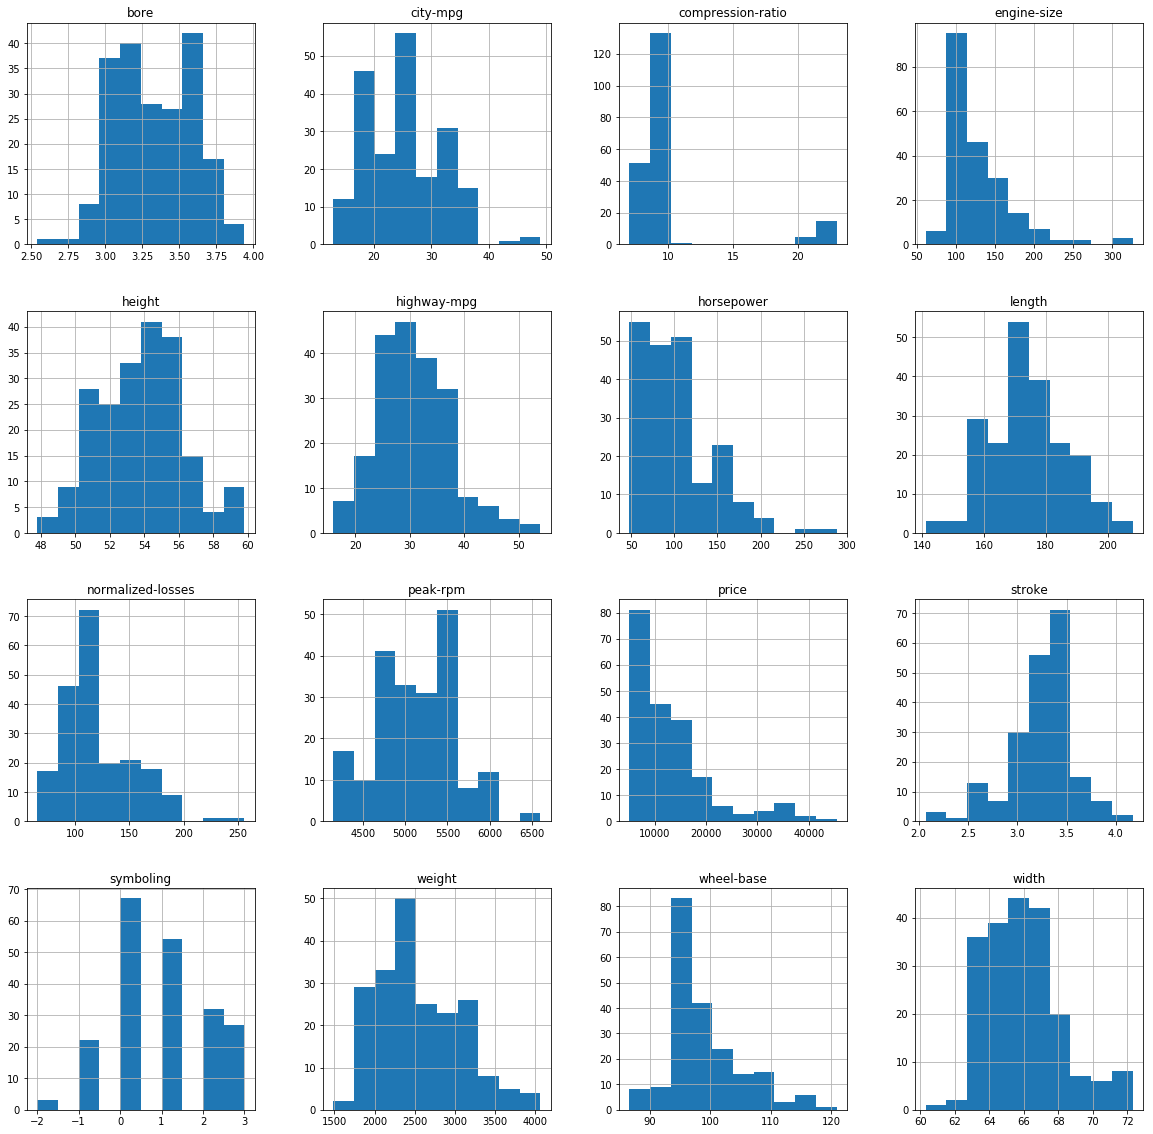

In [19]:
f, ax = plt.subplots(figsize=(20, 20))    

columns_to_normalize = numeric_features + [label]
car_data[columns_to_normalize ].hist(ax=ax)
plt.show()

For normalization, I am going to follow the [guidelines](https://developers.google.com/machine-learning/data-prep/transform/normalization) provided by the Google Data Prep course:
* Scale feature values if they are more or less uniformly distributed.
* Clip the feature values if there are extreme outliers.
* Log scale the feature values if the distribution conforms to the power law distribution.
* Z-score normalize the feature if it isn't uniform, nor does it contain extreme outliers, nor conforms to the power law distribution.


Using my best judgment, I've declared a list for each normalization method I will use and filled them with the feature names that I think should be normalized by the given method.

In [20]:
norm_scale_features = ['bore', 'city-mpg', 'height', 'highway-mpg', 'length',
                       'peak-rpm', 'stroke', 'weight', 'width', 'symboling']
norm_clip_features = ['compression-ratio']
norm_log_features = ['horsepower', 'price']
norm_z_features = ['engine-size', 'normalized-losses', 'wheel-base']

Let's now define the normalization methods. I think that for clipping 'compression-ratio', a max value of 12 is good enough.

In [21]:
def normalize_scale(df):
    df = df.apply(lambda x: (x - df.min()) / (df.max() - df.min()))
    return df
             
def normalize_clip(df):
    df = df.apply(lambda x: min(x, 12))
    return df

def normalize_log(df):
    df = df.apply(lambda x: np.log(x))
    return df
    
def normalize_z(df):
    df = df.apply(lambda x: (x - df.mean()) / df.std())
    return df

And then normalize the features:

In [22]:
car_data_norm = car_data.copy()


for feature in norm_scale_features:
    car_data_norm[feature] = normalize_scale(car_data_norm[feature])
    
for feature in norm_clip_features:
    car_data_norm[feature] = normalize_clip(car_data_norm[feature])
    
for feature in norm_log_features:
    car_data_norm[feature] = normalize_log(car_data_norm[feature])

for feature in norm_z_features:
    car_data_norm[feature] = normalize_z(car_data_norm[feature])

Now that the data is normalized, let's again have a look at it.

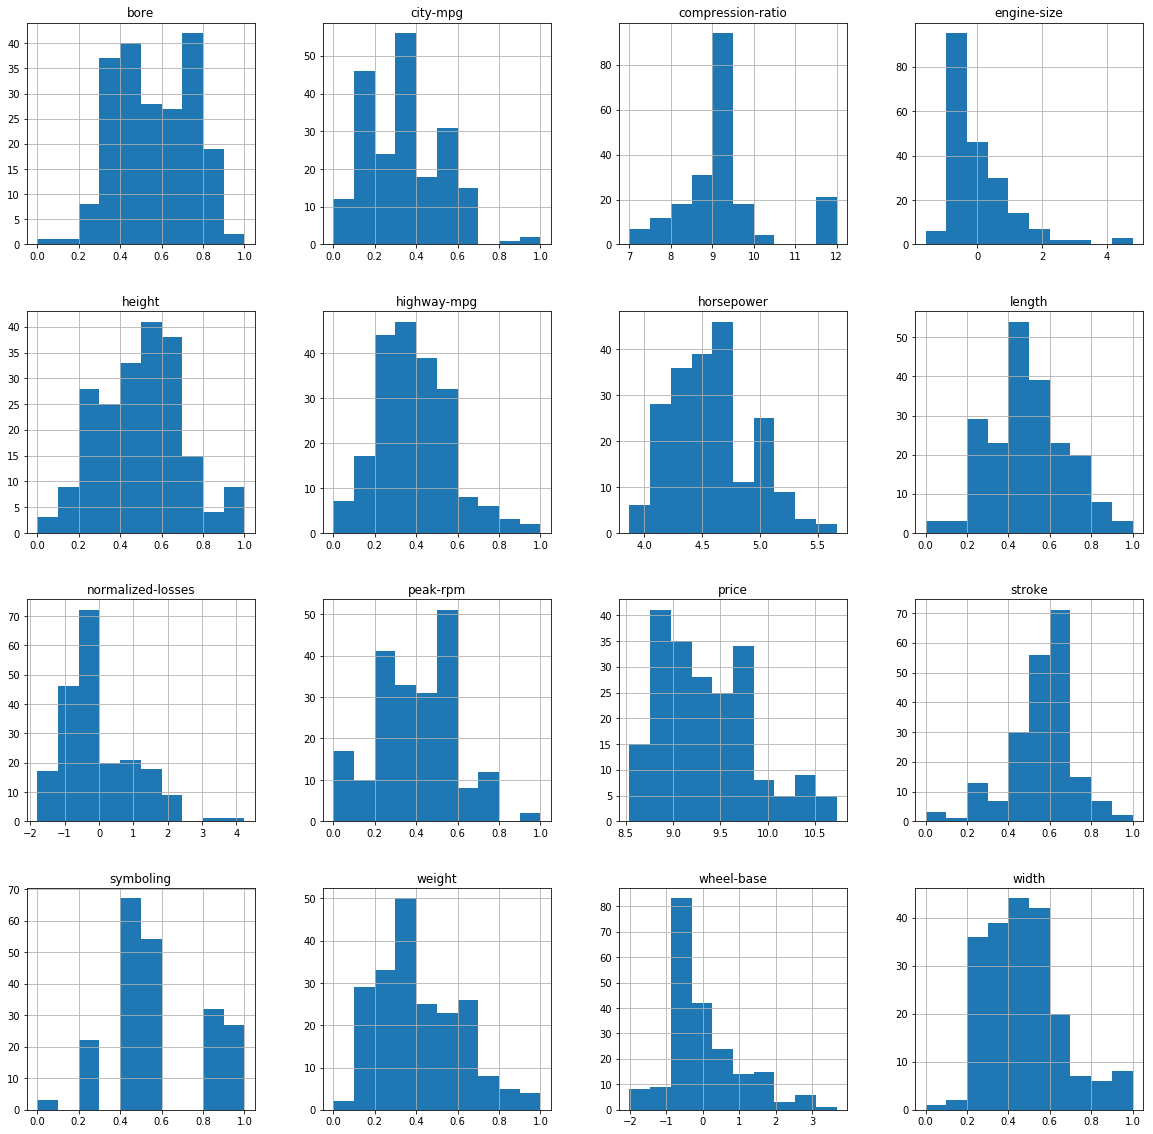

In [23]:
f, ax = plt.subplots(figsize=(20, 20))    

car_data_norm[columns_to_normalize].hist(ax=ax)
plt.show()

The scales of "compression-ratio" and "price" are a little high. Let's bring them to closer to others.

In [24]:
car_data_norm['compression-ratio'] = normalize_scale(car_data_norm['compression-ratio'])
car_data_norm['price'] = normalize_scale(car_data_norm['price'])

And let's have a look at them:

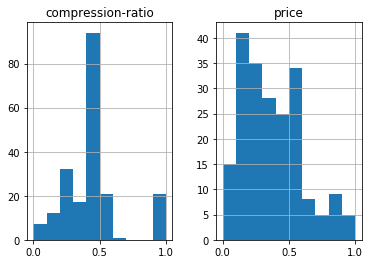

In [25]:
car_data_norm[['compression-ratio', 'price']].hist()
plt.show()

Seems good enough.

Now that we've normalized our features, let's again train our models and assess their performance, starting with just numeric features. Then, I will test categorical features and the entire dataset.

In [26]:
car_data_norm.reindex(np.random.permutation(car_data_norm.index))

X = car_data_norm[numeric_features]
y = car_data_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lin_regressor.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
svr.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

print('Linear regressor train score: ', lin_regressor.score(X_train, y_train))
print('Linear regressor test score: ', lin_regressor.score(X_test, y_test))

print('SGD linear regressor train score: ', sgd_regressor.score(X_train, y_train))
print('SGD linear regressor test score: ', sgd_regressor.score(X_test, y_test))

print('SVR train score: ', svr.score(X_train, y_train))
print('SVR test score: ', svr.score(X_test, y_test))

print('Decision Tree Regressor score: ', tree_regressor.score(X_train, y_train))
print('Decision Tree Regressor test score: ', tree_regressor.score(X_test, y_test))

print('Random forest regressor train score: ', rf_regressor.score(X_train, y_train))
print('Random forest regressor test score: ', rf_regressor.score(X_test, y_test))

Linear regressor train score:  0.8636934203627411
Linear regressor test score:  0.7073818154569588
SGD linear regressor train score:  0.7741113523000656
SGD linear regressor test score:  0.7659480458871285
SVR train score:  0.8535668806698532
SVR test score:  0.837163842197351
Decision Tree Regressor score:  0.9992003620402705
Decision Tree Regressor test score:  0.8392064722163526
Random forest regressor train score:  0.9738655962679232
Random forest regressor test score:  0.8852692759138409


Compared to our baseline score, the performance has increased for all models, but especially for SGD Regressor and SVR. However, we can notice that some models do not generalize well. Only SGD Regressor and SVR have comparatively good test scores relative to the train score, but they aren't too good nonetheless.

Let's do one more check - cross-validate the results. I am setting the number of folds to 5 so that the train to test set ratio stays 4 to 1. In the *train_test_split* method, the *test_size* argument by default is set to 0.2, so our cross validation should deliver results close to what the models have actually delivered.

According to [Machine Learning Mastery](https://machinelearningmastery.com/k-fold-cross-validation/), the process of cross-validation is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups.
3. For each unique group:
    1. Take the group as a hold out or test data set.
    2. Take the remaining groups as a training data set.
    3. Fit a model on the training set and evaluate it on the test set.
    4. Retain the evaluation score and discard the model.
4. Summarize the skill of the model using the sample of model evaluation scores.

By default, cross validation assesses model performance with its estimator. The default estimator in all the models is the R^2 score.

Pay special attention to the test score - the train score may be high, but it is the test score that will show how well the models generalize. We will have 5 test scores to review since cross validation will do 5 passes.

In [27]:
from sklearn.model_selection import cross_validate

cross_validate(lin_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00368834, 0.00275898, 0.00318313, 0.0027287 , 0.00300789]),
 'score_time': array([0.00145221, 0.00131464, 0.00140667, 0.00131798, 0.00133276]),
 'test_score': array([0.79342591, 0.81415708, 0.69869027, 0.68037351, 0.51074882]),
 'train_score': array([0.83570552, 0.82735187, 0.84765188, 0.85910743, 0.85742192])}

In [28]:
cross_validate(sgd_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00376487, 0.00287819, 0.00285554, 0.00202084, 0.0018785 ]),
 'score_time': array([0.00236249, 0.00148869, 0.00163817, 0.00108743, 0.00110912]),
 'test_score': array([0.82424109, 0.78183038, 0.60365793, 0.57822595, 0.51877817]),
 'train_score': array([0.75770145, 0.75625608, 0.77464381, 0.80276511, 0.79472934])}

In [29]:
cross_validate(svr, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00447011, 0.00341582, 0.00297046, 0.00315666, 0.00309944]),
 'score_time': array([0.00140214, 0.00147009, 0.00113726, 0.00116253, 0.00115752]),
 'test_score': array([0.78735886, 0.83147598, 0.58390172, 0.69274518, 0.5741592 ]),
 'train_score': array([0.8655884 , 0.85867853, 0.87739937, 0.87073369, 0.87641289])}

In [30]:
cross_validate(tree_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00442028, 0.00302148, 0.00259471, 0.00260782, 0.00253296]),
 'score_time': array([0.00152087, 0.00115514, 0.00109982, 0.00102043, 0.00109482]),
 'test_score': array([0.47640396, 0.68529305, 0.07376219, 0.58950411, 0.65640224]),
 'train_score': array([0.99894346, 0.99904945, 0.99849055, 0.99834993, 0.99852398])}

In [31]:
cross_validate(rf_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.01809359, 0.01519012, 0.01465034, 0.01458454, 0.01445174]),
 'score_time': array([0.00233245, 0.00221968, 0.00206947, 0.00200987, 0.00209117]),
 'test_score': array([0.80251103, 0.81571902, 0.5115697 , 0.70236746, 0.73530275]),
 'train_score': array([0.97567671, 0.98370524, 0.97506539, 0.981224  , 0.98170726])}

Apparently, the models aren't nearly as accurate as the scores have shown. The best models on average appear to be Decision Tree Regressor and Random Forest Regressor. However, they still do not generalize well to the test data.

As we could've seen from the cross-validation scores, each model performed well on some test groups and failed on others. The reason for this probably is the small size of the dataset - 205 samples do not allow the models to train properly and generalize to new data well. 

If I were to judge based on my newbie ML knowledge, I'd say that more data is required to make a good model. So far, all the models haven't been generalizing well.

Let's now try categorical features.

In [32]:
X = car_data_norm[categorical_features]
y = car_data_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lin_regressor.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
svr.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

print('Linear regressor train score: ', lin_regressor.score(X_train, y_train))
print('Linear regressor test score: ', lin_regressor.score(X_test, y_test))

print('SGD linear regressor train score: ', sgd_regressor.score(X_train, y_train))
print('SGD linear regressor test score: ', sgd_regressor.score(X_test, y_test))

print('SVR train score: ', svr.score(X_train, y_train))
print('SVR test score: ', svr.score(X_test, y_test))

print('Decision Tree Regressor score: ', tree_regressor.score(X_train, y_train))
print('Decision Tree Regressor test score: ', tree_regressor.score(X_test, y_test))

print('Random forest regressor train score: ', rf_regressor.score(X_train, y_train))
print('Random forest regressor test score: ', rf_regressor.score(X_test, y_test))

Linear regressor train score:  0.6689713663550332
Linear regressor test score:  0.5986505072420343
SGD linear regressor train score:  0.5637292915302716
SGD linear regressor test score:  0.5821203846562999
SVR train score:  0.8756147723448116
SVR test score:  0.7273238499312363
Decision Tree Regressor score:  0.9596720680504295
Decision Tree Regressor test score:  0.7360229375218003
Random forest regressor train score:  0.9363350036512545
Random forest regressor test score:  0.8081911103994711


Accuracy appears to have reduced somewhat across all models, but the linear models have suffered the most. It seems that categorical features aren't as good as numeric features.

Let's confirm this with cross validation.

In [33]:
cross_validate(lin_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.0034225 , 0.0029242 , 0.00313544, 0.00316286, 0.00268412]),
 'score_time': array([0.00166941, 0.00147462, 0.00136352, 0.00141907, 0.00133753]),
 'test_score': array([0.65580759, 0.38064315, 0.63221646, 0.15196453, 0.36009562]),
 'train_score': array([0.66286787, 0.71452741, 0.66686153, 0.69204428, 0.68927082])}

In [34]:
cross_validate(sgd_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00344801, 0.00205398, 0.00238824, 0.00201082, 0.00197196]),
 'score_time': array([0.00235128, 0.0010829 , 0.00125003, 0.00107431, 0.00105095]),
 'test_score': array([ 0.71266185,  0.28428868,  0.50449284,  0.06931594, -0.05601483]),
 'train_score': array([0.5197262 , 0.63440263, 0.59500464, 0.60197377, 0.63132546])}

In [35]:
cross_validate(svr, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.0046587 , 0.00351191, 0.0039618 , 0.00355411, 0.00427175]),
 'score_time': array([0.00155067, 0.00117779, 0.00130844, 0.00158453, 0.00138402]),
 'test_score': array([-0.04327355,  0.10723704,  0.51728314,  0.17030007,  0.13308829]),
 'train_score': array([0.87578269, 0.86807448, 0.8903116 , 0.87162123, 0.89152817])}

In [36]:
cross_validate(tree_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00412536, 0.00251412, 0.00249696, 0.00184846, 0.00187445]),
 'score_time': array([0.00166535, 0.00109696, 0.00114822, 0.00104976, 0.00105858]),
 'test_score': array([ 0.52462132,  0.54101794, -0.08367367,  0.37940774, -0.94329687]),
 'train_score': array([0.95506255, 0.95567796, 0.95961534, 0.94713418, 0.95442911])}

In [37]:
cross_validate(rf_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.01403046, 0.01028657, 0.01017261, 0.0099957 , 0.00989366]),
 'score_time': array([0.00283027, 0.00210357, 0.00193286, 0.00194001, 0.0018661 ]),
 'test_score': array([ 0.46886661,  0.44798337,  0.50412127,  0.48367957, -0.39905004]),
 'train_score': array([0.92420615, 0.92999451, 0.93559842, 0.92278248, 0.93420598])}

The scores have definitely become worse across the board. Thereby, categorical features aren't as predictive as numeric features.

Finally, let's try training with all the features.

In [38]:
X = car_data_norm.drop('price', axis=1)
y = car_data_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lin_regressor.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
svr.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

print('Linear regressor train score: ', lin_regressor.score(X_train, y_train))
print('Linear regressor test score: ', lin_regressor.score(X_test, y_test))

print('SGD linear regressor train score: ', sgd_regressor.score(X_train, y_train))
print('SGD linear regressor test score: ', sgd_regressor.score(X_test, y_test))

print('SVR train score: ', svr.score(X_train, y_train))
print('SVR test score: ', svr.score(X_test, y_test))

print('Decision Tree Regressor score: ', tree_regressor.score(X_train, y_train))
print('Decision Tree Regressor test score: ', tree_regressor.score(X_test, y_test))

print('Random forest regressor train score: ', rf_regressor.score(X_train, y_train))
print('Random forest regressor test score: ', rf_regressor.score(X_test, y_test))

Linear regressor train score:  0.891681269395235
Linear regressor test score:  0.8615958042780951
SGD linear regressor train score:  0.8343184265247339
SGD linear regressor test score:  0.7661218806484889
SVR train score:  0.9096273935879722
SVR test score:  0.8337619464087705
Decision Tree Regressor score:  0.9986470071508431
Decision Tree Regressor test score:  0.8665234698155349
Random forest regressor train score:  0.9735346225977095
Random forest regressor test score:  0.8796407285049815


The train scores have improved across all models, but more noticeably so in the SGD and linear regressors. The test score stays roughly the same, so the models seem not to have improved in generalization.

Cross validation will give us a better picture.

In [39]:
cross_validate(lin_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00407958, 0.00362372, 0.00361371, 0.00327992, 0.00268149]),
 'score_time': array([0.00234222, 0.00182581, 0.0015831 , 0.00126648, 0.00124645]),
 'test_score': array([0.81149217, 0.80803638, 0.56770245, 0.64926777, 0.61347147]),
 'train_score': array([0.88909173, 0.90012978, 0.91224948, 0.89428869, 0.90143602])}

In [40]:
cross_validate(sgd_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00382233, 0.00235367, 0.0023489 , 0.00216031, 0.00214553]),
 'score_time': array([0.00135207, 0.00117612, 0.00113893, 0.00116014, 0.00114179]),
 'test_score': array([0.87860748, 0.84267583, 0.65522924, 0.39948896, 0.42915956]),
 'train_score': array([0.81492518, 0.80467657, 0.8312896 , 0.84061125, 0.82112981])}

In [41]:
cross_validate(svr, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00416899, 0.00314403, 0.00364137, 0.00349641, 0.00332117]),
 'score_time': array([0.00144887, 0.0015552 , 0.00129437, 0.00128222, 0.00158429]),
 'test_score': array([0.1254459 , 0.35804204, 0.84080395, 0.26856785, 0.18160304]),
 'train_score': array([0.90635043, 0.89811162, 0.91075962, 0.89887728, 0.91787947])}

In [42]:
cross_validate(tree_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00486469, 0.00339818, 0.00355935, 0.00306392, 0.0031805 ]),
 'score_time': array([0.00174451, 0.00117254, 0.00117683, 0.00113606, 0.00117016]),
 'test_score': array([0.13353589, 0.79338894, 0.07102804, 0.64946649, 0.40267507]),
 'train_score': array([0.99894346, 0.99904945, 0.99849055, 0.99834992, 0.99852397])}

In [43]:
cross_validate(rf_regressor, X, y, cv=5, return_train_score=True)

{'fit_time': array([0.017519  , 0.01669168, 0.01677299, 0.01673698, 0.01649237]),
 'score_time': array([0.00232792, 0.00232983, 0.00237536, 0.00231791, 0.00227427]),
 'test_score': array([0.74104876, 0.78942036, 0.4956323 , 0.7245541 , 0.77944786]),
 'train_score': array([0.97507051, 0.97665835, 0.97533457, 0.98187288, 0.97779023])}

The linear regressor seems to have improved a little, but its performance still is far from satisfying.

At the moment, I wouldn't be going with any of the models since they all have shown poor performance. With that being said, models training on all features have shown relatively good performance.

Can we improve the models even slightly though? Let's draw a validation curve to see how changes in the models' some parameters impact their accuracy. The method *plot_validation_curve* was based on [scikit-learn's tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html).

In [44]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(title, estimator, X, y, param_name, param_range, ylim=0.0, cv=5):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv=cv)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 10))
    
    plt.title(title)
    plt.xlabel('%s range' % param_name)
    plt.ylabel('Score')
    plt.ylim(ylim)
    
    plt.plot(param_range, train_scores_mean, 'o-', color='blue', lw=2, label='Training score')
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='lightblue')
    plt.plot(param_range, test_scores_mean, 'o-', color='orange', lw=2, label='Validation score')
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='yellow')
    plt.legend(loc="best")
    plt.show()

Let's start with the regularization term and its value. The default regularization term used in the SGD regressor is l2. Let's start with it.

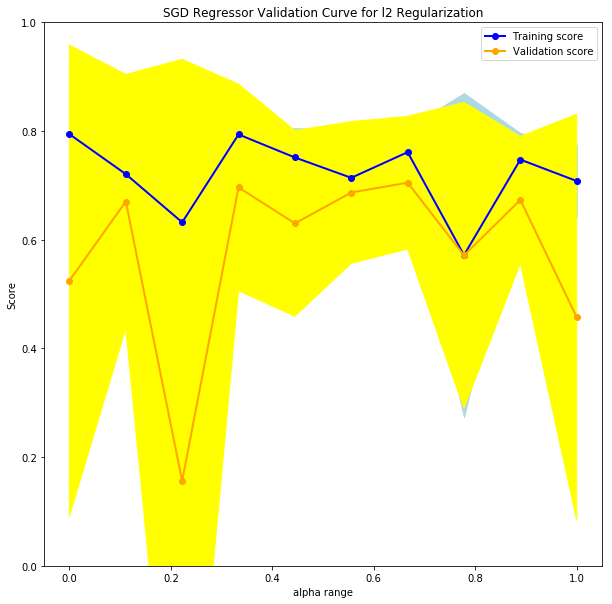

In [45]:
plot_validation_curve('SGD Regressor Validation Curve for l2 Regularization', sgd_regressor, X, y, 'alpha', np.linspace(0, 1, 10))

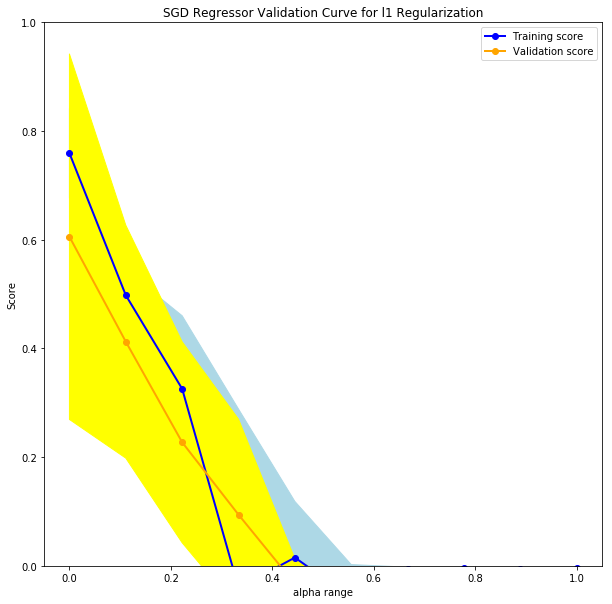

In [46]:
sgd_regressor.penalty='l1'
plot_validation_curve('SGD Regressor Validation Curve for l1 Regularization', sgd_regressor, X, y, 'alpha', np.linspace(0, 1, 10))

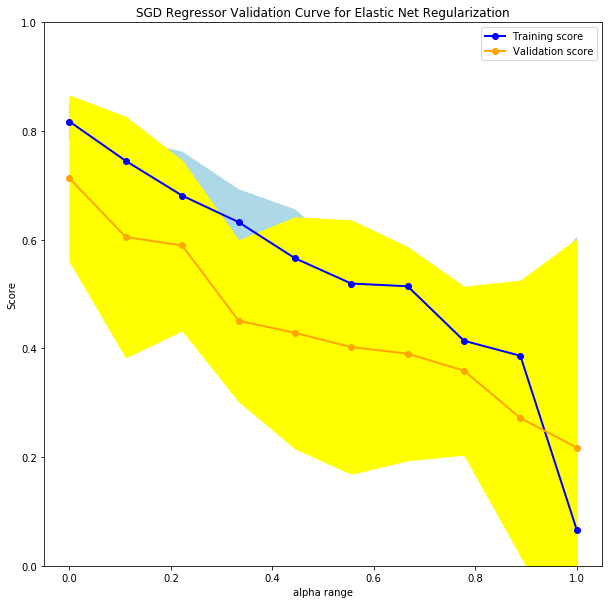

In [47]:
sgd_regressor.penalty='elasticnet'
plot_validation_curve('SGD Regressor Validation Curve for Elastic Net Regularization', sgd_regressor, X, y, 'alpha', np.linspace(0, 1, 10))

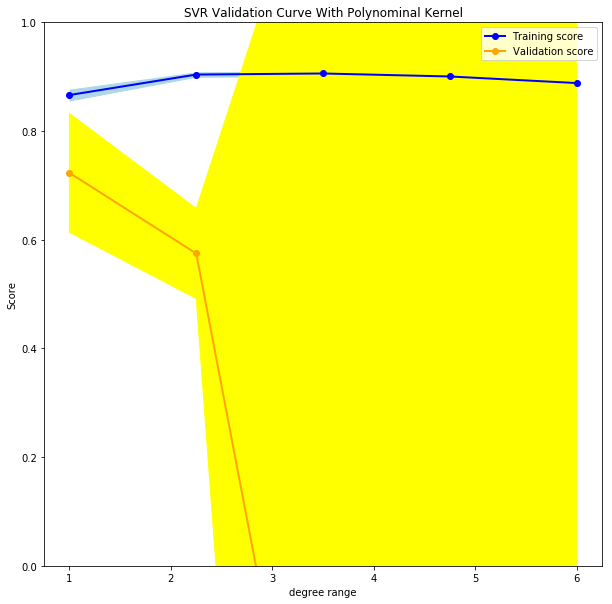

In [48]:
svr.kernel='poly'
plot_validation_curve('SVR Validation Curve With Polynominal Kernel', svr, X, y, 'degree', np.linspace(1, 6, 5), ylim=0.0)
plt.show()

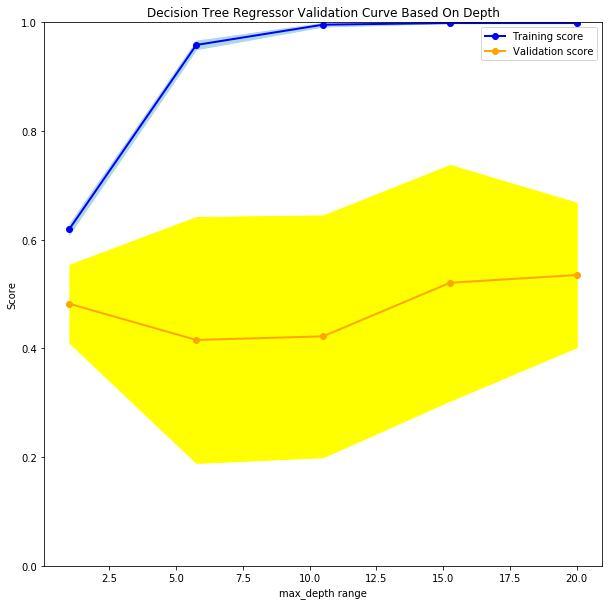

In [49]:
plot_validation_curve('Decision Tree Regressor Validation Curve Based On Depth', tree_regressor, X, y, 'max_depth', np.linspace(1, 20, 5), ylim=0.0)
plt.show()

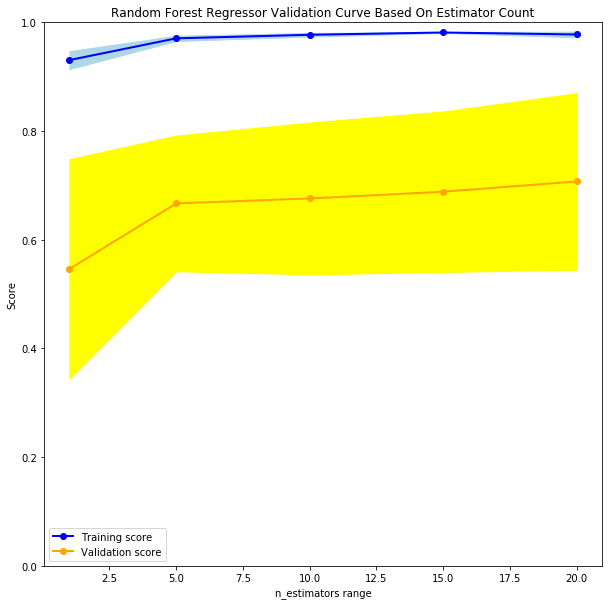

In [50]:
plot_validation_curve('Random Forest Regressor Validation Curve Based On Estimator Count', rf_regressor, X, y, 'n_estimators', np.linspace(1, 20, 5).astype(int), ylim=0.0)
plt.show()

With Random Forest Regressor, 5 estimators seems to be the optimum, so let's plot the validation curve based on depth with the number of estimators set to 5.

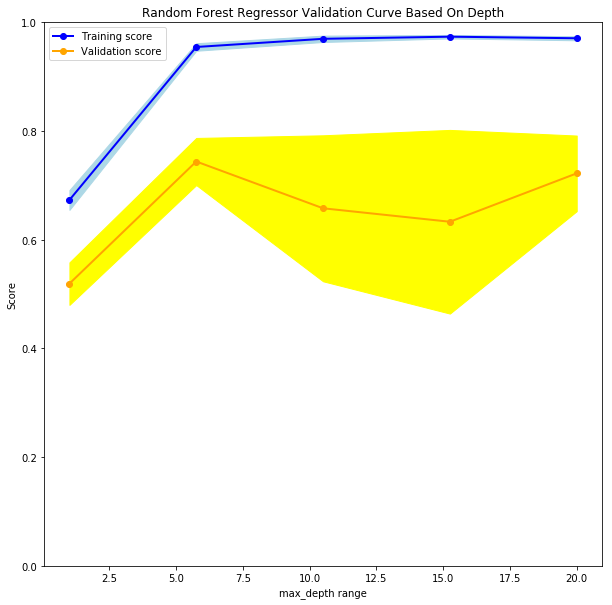

In [51]:
rf_regressor.n_estimators=5
plot_validation_curve('Random Forest Regressor Validation Curve Based On Depth', rf_regressor, X, y, 'max_depth', np.linspace(1, 20, 5), ylim=0.0)
plt.show()

Playing with some parameters does indeed improve the train scores, but their performance still remains sub-par. The models appear to be severely underfitting, which is evident from the big difference between train and test scores. Due to this, I don't see any point in trying to fiddle will all the parameters that could be changed in the models.

Also, note the yellow zone around the plots of the test score. This yellow zone marks the standard deviation of the predictions from the mean. The standard deviation is comparatively low during training but quite high during testing. I wouldn't want to use any of these models in production.

Earlier, I've said that the low performance of the models may be due to the small size of the dataset. One easy way to check this is to plot a learning curve, which will show us the relationship between the train set size and the model accuracy. The code has been borrowed from [this scikit-learn tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html).

I am setting the value of cv (number of folds for cross validation) for the method *learning_curve* to 10 so that we better see how the train set size impacts performance. 

In [52]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.ylim(ylim)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross validation score')
    plt.legend()
    plt.show()

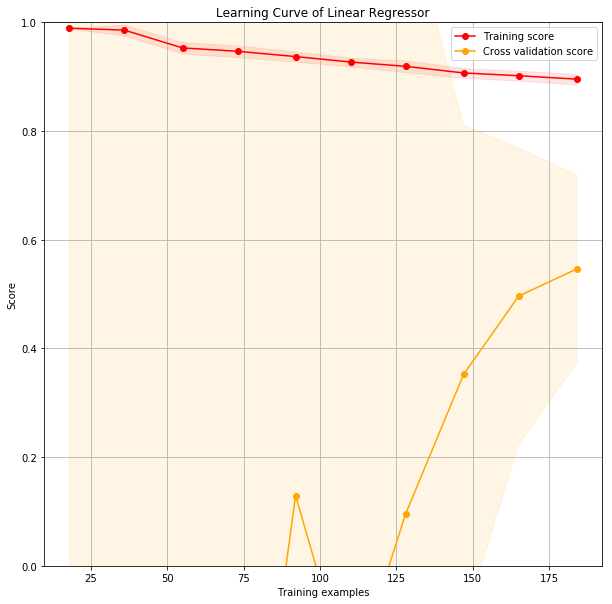

In [53]:
plot_learning_curve(lin_regressor, 'Learning Curve of Linear Regressor', X, y)

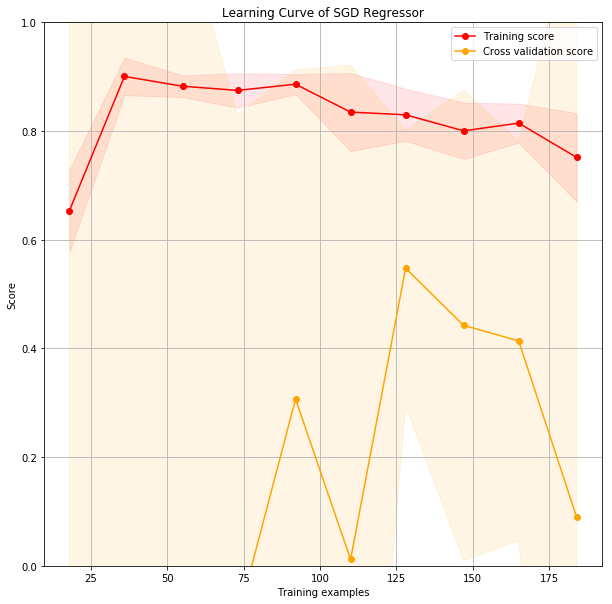

In [54]:
plot_learning_curve(sgd_regressor, 'Learning Curve of SGD Regressor', X, y)

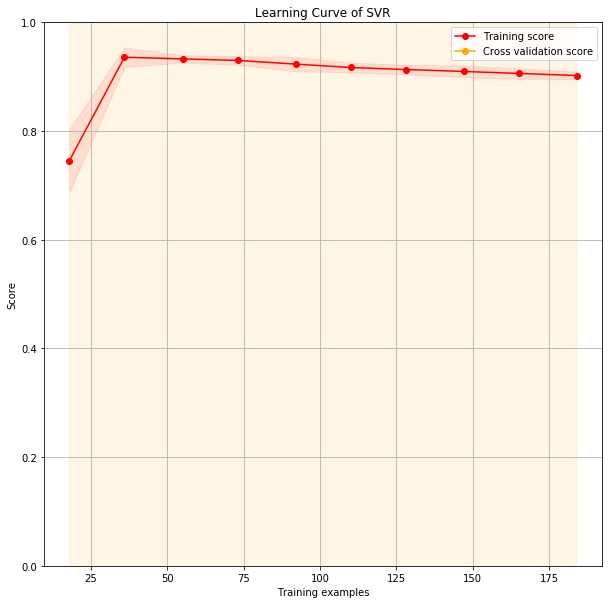

In [55]:
plot_learning_curve(svr, 'Learning Curve of SVR', X, y)

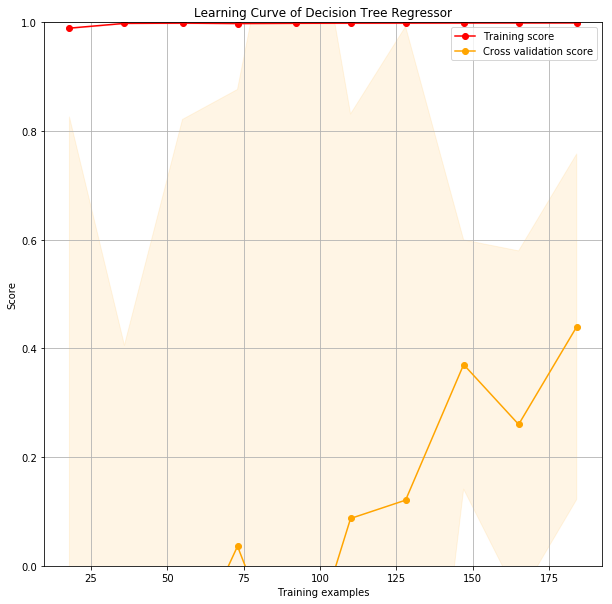

In [56]:
plot_learning_curve(tree_regressor, 'Learning Curve of Decision Tree Regressor', X, y)

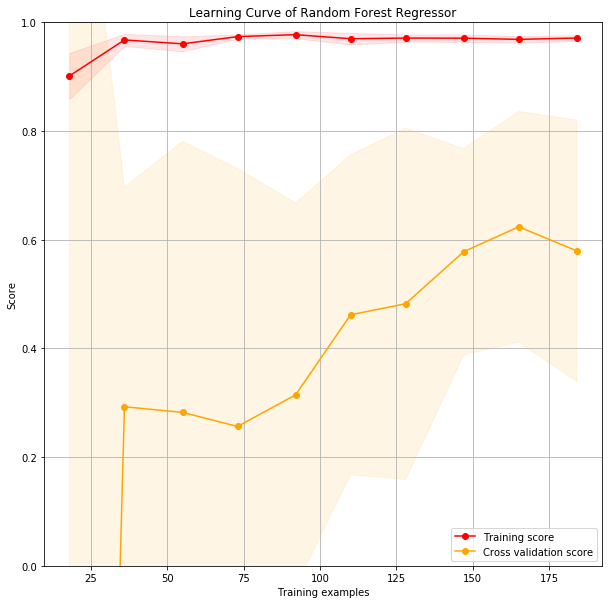

In [57]:
plot_learning_curve(rf_regressor, 'Learning Curve of Random Forest Regressor', X, y)

One interesting thing to note from these plots is that linear models - both the regular linear regressor and the SGD regressor - and SVR lose training accuracy as the number of training examples increases. The accuracy decrease isn't whopping, but it may have been higher had the dataset been bigger.

However, the test accuracy kind of increases as the train set size gets bigger, and the standard deviation decreases as well. This isn't conclusive since the test score plot jumps up and down, but I would assume that increasing the size of the dataset would positively affect the test accuracy and the models' ability to generalize.

With that being said, I again think that this dataset is too small for accurate learning. However, it may also be that I am yet bad at feature engineering.

In conclusion, here's what I discovered from this analysis:
* This is a difficult dataset for an inexperienced data analyst.
* The models appear to be underfitting, which may be due to the small dataset size, or maybe poor feature engineering.
* Normalization can significantly improve model performance if the feature values are skewed or on vastly different scales.

I will definitely return to this dataset since it's a big challenge for me as a beginning data scientist. I suspect that feature crosses or more careful normalization would deliver better results across the board.